In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import  pyplot as plt
%config Completer.use_jedi = False
data = pd.read_csv("Spotify Youtube Dataset.csv")

In [103]:
data.drop(columns=['Url_spotify', 'Uri', 'Url_youtube', 'Unnamed: 0'], inplace=True)
data.head(3)


Artist                                          Track  \
0  Gorillaz                                 Feel Good Inc.   
1  Gorillaz                                Rhinestone Eyes   
2  Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   

                                           Album Album_type  Danceability  \
0                                     Demon Days      album         0.818   
1                                  Plastic Beach      album         0.676   
2  New Gold (feat. Tame Impala and Bootie Brown)     single         0.695   

   Energy  Key  Loudness  Speechiness  Acousticness  ...  Duration_ms  \
0   0.705  6.0    -6.679       0.1770       0.00836  ...     222640.0   
1   0.703  8.0    -5.815       0.0302       0.08690  ...     200173.0   
2   0.923  1.0    -3.930       0.0522       0.04250  ...     215150.0   

                                               Title   Channel        Views  \
0         Gorillaz - Feel Good Inc. (Official Video)  Gorillaz  693555221.0   
1  Gorillaz - Rhinestone Eyes [Storyboard Film] (...  Gorillaz   72011645.0   
2  Gorillaz - New Gold ft. Tame Impala & Bootie B...  Gorillaz    8435055.0   

       Likes  Comments                                        Description  \
0  6220896.0  169907.0  Official HD Video for Gorillaz' fantastic trac...   
1  1079128.0   31003.0  The official video for Gorillaz - Rhinestone E...   
2   282142.0    7399.0  Gorillaz - New Gold ft. Tame Impala & Bootie B...   

   Licensed  official_video        Stream  
0      True            True  1.040235e+09  
1      True            True  3.100837e+08  
2      True            True  6.306347e+07  

[3 rows x 24 columns]

In [104]:
data['Likes'] = data['Likes'].fillna(0)
data['Comments'] = data['Likes'].fillna(0)
data.dropna(inplace=True)
data.isna().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Description         0
Licensed            0
official_video      0
Stream              0
dtype: int64

**TOP 10 ARTISTS BY VIEWS**

In [105]:

data.groupby('Artist')['Views'].sum().sort_values(ascending=False).head(10)

Artist
Ed Sheeran                 1.546021e+10
CoComelon                  1.460167e+10
Katy Perry                 1.312063e+10
Charlie Puth               1.216759e+10
Luis Fonsi                 1.162811e+10
Justin Bieber              1.099079e+10
Daddy Yankee               1.086828e+10
Bruno Mars                 1.023184e+10
Macklemore & Ryan Lewis    1.012206e+10
Coldplay                   9.997278e+09
Name: Views, dtype: float64

**TOP 10 SONGS BY STREAMS**

In [106]:
most_streams = data[['Track', 'Stream']]
most_streams.sort_values('Stream', ascending=False).head(10)

Track        Stream
15250                                Blinding Lights  3.386520e+09
12452                                   Shape of You  3.362005e+09
19186                              Someone You Loved  2.634013e+09
17937                     rockstar (feat. 21 Savage)  2.594927e+09
17445  Sunflower - Spider-Man: Into the Spider-Verse  2.538330e+09
17938  Sunflower - Spider-Man: Into the Spider-Verse  2.538330e+09
13503                                      One Dance  2.522432e+09
16099                                         Closer  2.456205e+09
16028                                         Closer  2.456205e+09
14030                                       Believer  2.369272e+09

**THE MOST COMMON ALBUM TYPE**

In [107]:
data['Album_type'].unique()

array(['album', 'single', 'compilation'], dtype=object)

In [115]:
common_type = data['Album_type'].value_counts()
common_type

Album_type
album          13952
single          4653
compilation      693
Name: count, dtype: int64

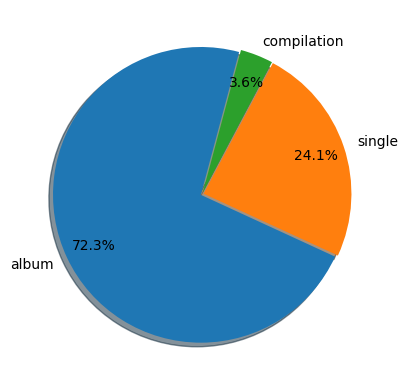

In [137]:
plt.pie(common_type, labels=common_type.index, autopct="%1.1f%%", startangle=75, explode=(0.01,0.01,0.01), shadow=True, pctdistance=0.8)
plt.show()

**AVERAGE VIEWS, LIKES, COMMENTS COMPARED BETWEEN DIFFERENT ALBUM TYPES**

In [146]:
df = data.groupby('Album_type')[['Likes', 'Views', 'Comments']].mean()
df = df.reset_index()
df

Album_type          Likes         Views       Comments
0        album  672593.609948  1.014359e+08  672593.609948
1  compilation  544275.818182  8.500535e+07  544275.818182
2       single  722266.303890  8.480843e+07  722266.303890

In [147]:
df_melted = pd.melt(df, id_vars='Album_type', var_name='Attribute', value_name='Total')

<Axes: xlabel='Album_type', ylabel='Total'>

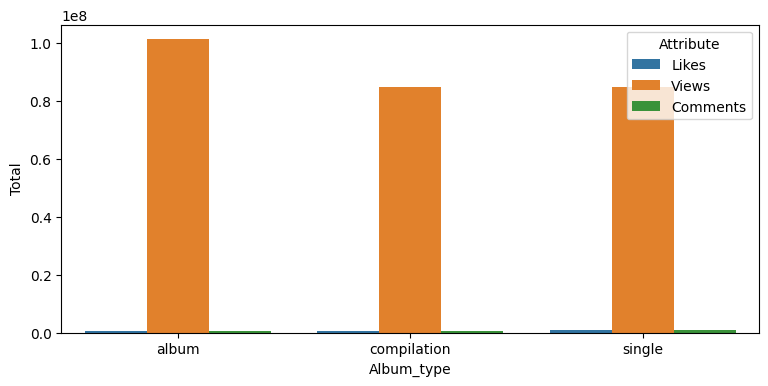

In [148]:
plt.figure(figsize=(9,4))
sns.barplot(x='Album_type', y='Total', hue='Attribute', data=df_melted)

**TOP 10 CHANNELS BASED ON VIEWS**

In [153]:
c_views = data.groupby('Channel')['Views'].sum().sort_values(ascending=False)
c_views = c_views.reset_index()
c_views.head()


Channel         Views
0          T-Series  4.796159e+10
1     LuisFonsiVEVO  2.170252e+10
2  CalvinHarrisVEVO  1.828114e+10
3        Macklemore  1.700341e+10
4        Ed Sheeran  1.691822e+10

In [166]:
sns.set_style("darkgrid")

<Axes: xlabel='Views', ylabel='Channel'>

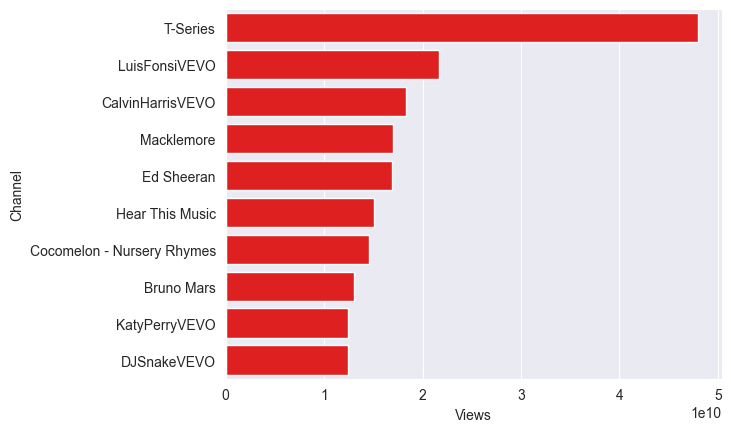

In [168]:
sns.barplot(x='Views', y='Channel', data=c_views.head(10), color='red')

**THE MOST POPULAR TRACK**

In [169]:
data.sort_values('Views', ascending=False).head(1)

Artist      Track Album Album_type  Danceability  Energy  Key  \
1147  Luis Fonsi  Despacito  VIDA      album         0.655   0.797  2.0   

      Loudness  Speechiness  Acousticness  ...  Duration_ms  \
1147    -4.787        0.153         0.198  ...     229360.0   

                                        Title        Channel         Views  \
1147  Luis Fonsi - Despacito ft. Daddy Yankee  LuisFonsiVEVO  8.079649e+09   

           Likes    Comments  \
1147  50788652.0  50788652.0   

                                            Description  Licensed  \
1147  “Despacito” disponible ya en todas las platafo...      True   

      official_video        Stream  
1147            True  1.506598e+09  

[1 rows x 24 columns]

**MOST LIKES AND VIEWS PERCENT**

In [174]:
track_stats = data[['Track', 'Likes', 'Views']]
track_stats['Ration'] = track_stats['Likes'] / track_stats['Views'] * 100

C:\Users\romas\AppData\Local\Temp\ipykernel_13932\1547739936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_stats['Ration'] = track_stats['Likes'] / track_stats['Views'] * 100


In [176]:
track_stats.sort_values('Ration', ascending=False).head()

Track     Likes      Views     Ration
19968                         Intro  237761.0   954081.0  24.920421
19969                   Safety Zone  453910.0  1952637.0  23.246000
19967                        Future  250116.0  1180522.0  21.186899
19971                 Pandora's Box  253702.0  1265231.0  20.051832
16297  My Universe - Galantis Remix  371437.0  2067753.0  17.963316

**ALBUMS THAT HAVE TRACKS WITH MOST DANCEABILITY**

In [182]:
most_danceable = data.groupby('Album')['Danceability'].mean().sort_values(ascending=False).head()
most_danceable = most_danceable.reset_index()
most_danceable

Album  Danceability
0                                   Funky Friday         0.975
1                           FOR CERTAIN (Deluxe)         0.975
2           The House Is Burning [homies begged]         0.971
3  Quality Control: Control The Streets Volume 2         0.970
4                                           N9NA         0.970

**CORRELATION BETWEEN LIKES, STREAMS, COMMENTS**

In [186]:
df_vlcs = data[['Views', 'Comments', 'Likes', 'Stream']]
df_vlcs.corr()

Views  Comments     Likes    Stream
Views     1.000000  0.891695  0.891695  0.603510
Comments  0.891695  1.000000  1.000000  0.655808
Likes     0.891695  1.000000  1.000000  0.655808
Stream    0.603510  0.655808  0.655808  1.000000